# Week 1 exercises

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
%matplotlib inline

try:
    df = pd.read_csv("ETH_EUR.csv", parse_dates = ["Date"])
    df.index = df["Date"]
    df2 = pd.read_csv("NASDAQOMX.csv", parse_dates = ["Trade Date"])
    df2.index = df2["Trade Date"]

except FileNotFoundError:
    import quandl
    df = quandl.get("GDAX/ETH_EUR", authtoken = "3CdfXCg8D_CWBs7UAwKr", parse_dates = ["Date"])
    df2 = quandl.get("NASDAQOMX/OMXN40", authtoken= "3CdfXCg8D_CWBs7UAwKr", parse_dates = ["Trade Date"])
    df.to_csv("ETH_EUR", encoding = "utf-8")
    df2.to_csv("NASDAQOMX", encoding = "utf-8")
    df2.index = df2["Trade Date"]

In [20]:
print(df.head())
print("====================================")
print(df2.head())

                 Date    Open    High     Low       Volume
Date                                                      
2017-05-30 2017-05-30  179.46  201.56  179.46   563.574044
2017-05-31 2017-05-31  201.49  210.31  192.10  1823.492476
2017-01-06 2017-01-06  205.00  211.20  180.00  4272.726510
2017-02-06 2017-02-06  192.34  204.54  192.34  1890.842875
2017-03-06 2017-03-06  197.00  201.22  196.52   604.755356
           Trade Date  Index Value  High  Low  Total Market Value  \
Trade Date                                                          
2008-11-17 2008-11-17       638.85   0.0  0.0        2.258580e+11   
2008-11-18 2008-11-18       636.30   0.0  0.0        2.249560e+11   
2008-11-19 2008-11-19       609.51   0.0  0.0        2.154880e+11   
2008-11-20 2008-11-20       591.20   0.0  0.0        2.090120e+11   
2008-11-24 2008-11-24       621.92   0.0  0.0        2.198740e+11   

            Dividend Market Value  
Trade Date                         
2008-11-17                    0

In [21]:
df2 = df2.rename(columns = {"Dividend Market Value":"Dividend",
                      "Total Market Value": "Total", "Index Value":"Index"})
df2

,Trade Date,Index,High,Low,Total,Dividend
Trade Date,,,,,,
2008-11-17,2008-11-17,638.85,0.00,0.00,2.258580e+11,0.0
2008-11-18,2008-11-18,636.30,0.00,0.00,2.249560e+11,0.0
2008-11-19,2008-11-19,609.51,0.00,0.00,2.154880e+11,0.0
2008-11-20,2008-11-20,591.20,0.00,0.00,2.090120e+11,0.0
2008-11-24,2008-11-24,621.92,0.00,0.00,2.198740e+11,0.0
...,...,...,...,...,...,...
2020-01-31,2020-01-31,1706.09,1726.58,1702.43,6.318630e+11,0.0
2020-03-02,2020-03-02,1708.42,1713.39,1699.99,6.327260e+11,0.0
2020-04-02,2020-04-02,1741.83,1741.83,1711.70,6.451010e+11,0.0


In [22]:
def nDescriptive(df, year = 0):
    '''
    Making a function that prints some descriptive numbers
    for each column. 
    TODO: I still havent gotten it to work for each year, meaning I want
    to be able to select a specific year. 
    '''
    nList = list(df.columns.values)
    df["years"] = pd.DatetimeIndex(df.index).year

    if year > 0:
        for i in nList[:-1]:
            print("======================================================")
            print("Total per",year, "for ",i)
            print(f"The Mean: {df[i].loc[df.years == year].mean()}")
            print(f"The Median: {df[i].loc[df.years == year].median()}")
            print(f"The Std: {df[i].loc[df.years == year].std()}")
            print(f"The quantile: {df[i].loc[df.years == year].quantile([0.25,0.5,0.75])}")
    elif year == 0:
        print("Total for all years in the dataset.")
        for i in nList[:-1]:
            print("======================================================")
            print(i)
            print(f"The Mean: {df[i].mean()}")
            print(f"The Median: {df[i].median()}")
            print(f"The Std: {df[i].std()}")
            print(f"The quantile: {df[i].quantile([0.25,0.5,0.75])}")

nDescriptive(df, year = 2018)

Total per 2018 for  Date
The Mean: 2018-06-04 15:17:22.471042560


TypeError: DatetimeIndex cannot perform the operation median

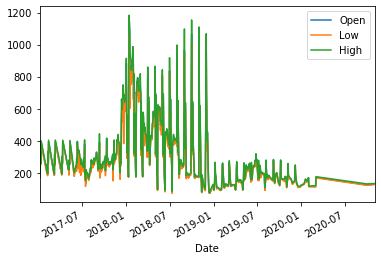

In [12]:
df[["Open", "Low", "High"]].plot()
plt.show()

In [17]:
print(df[[df.index, df["Low"]]])

KeyError: "None of [Index([(2017-05-30 00:00:00, 2017-05-31 00:00:00, 2017-01-06 00:00:00, 2017-02-06 00:00:00, 2017-03-06 00:00:00, 2017-04-06 00:00:00, 2017-05-06 00:00:00, 2017-06-06 00:00:00, 2017-07-06 00:00:00, 2017-08-06 00:00:00, 2017-09-06 00:00:00, 2017-10-06 00:00:00, 2017-11-06 00:00:00, 2017-12-06 00:00:00, 2017-06-13 00:00:00, 2017-06-14 00:00:00, 2017-06-15 00:00:00, 2017-06-16 00:00:00, 2017-06-17 00:00:00, 2017-06-18 00:00:00, 2017-06-19 00:00:00, 2017-06-20 00:00:00, 2017-06-21 00:00:00, 2017-06-22 00:00:00, 2017-06-23 00:00:00, 2017-06-24 00:00:00, 2017-06-25 00:00:00, 2017-06-26 00:00:00, 2017-06-27 00:00:00, 2017-06-28 00:00:00, 2017-06-29 00:00:00, 2017-06-30 00:00:00, 2017-01-07 00:00:00, 2017-02-07 00:00:00, 2017-03-07 00:00:00, 2017-04-07 00:00:00, 2017-05-07 00:00:00, 2017-06-07 00:00:00, 2017-07-07 00:00:00, 2017-08-07 00:00:00, 2017-09-07 00:00:00, 2017-10-07 00:00:00, 2017-11-07 00:00:00, 2017-12-07 00:00:00, 2017-07-13 00:00:00, 2017-07-14 00:00:00, 2017-07-15 00:00:00, 2017-07-16 00:00:00, 2017-07-17 00:00:00, 2017-07-18 00:00:00, 2017-07-19 00:00:00, 2017-07-20 00:00:00, 2017-07-21 00:00:00, 2017-07-22 00:00:00, 2017-07-23 00:00:00, 2017-07-24 00:00:00, 2017-07-25 00:00:00, 2017-07-26 00:00:00, 2017-07-27 00:00:00, 2017-07-28 00:00:00, 2017-07-29 00:00:00, 2017-07-30 00:00:00, 2017-07-31 00:00:00, 2017-01-08 00:00:00, 2017-02-08 00:00:00, 2017-03-08 00:00:00, 2017-04-08 00:00:00, 2017-05-08 00:00:00, 2017-06-08 00:00:00, 2017-07-08 00:00:00, 2017-08-08 00:00:00, 2017-09-08 00:00:00, 2017-10-08 00:00:00, 2017-11-08 00:00:00, 2017-12-08 00:00:00, 2017-08-13 00:00:00, 2017-08-14 00:00:00, 2017-08-15 00:00:00, 2017-08-16 00:00:00, 2017-08-17 00:00:00, 2017-08-18 00:00:00, 2017-08-19 00:00:00, 2017-08-20 00:00:00, 2017-08-21 00:00:00, 2017-08-22 00:00:00, 2017-08-23 00:00:00, 2017-08-24 00:00:00, 2017-08-25 00:00:00, 2017-08-26 00:00:00, 2017-08-27 00:00:00, 2017-08-28 00:00:00, 2017-08-29 00:00:00, 2017-08-30 00:00:00, 2017-08-31 00:00:00, 2017-01-09 00:00:00, 2017-02-09 00:00:00, 2017-03-09 00:00:00, 2017-04-09 00:00:00, 2017-05-09 00:00:00, 2017-06-09 00:00:00, ...), (179.46, 192.1, 180.0, 192.34, 196.52, 198.88, 215.93, 220.48, 218.0, 223.0, 230.0, 247.13, 284.07, 180.88, 317.68, 287.09, 226.28, 285.0, 309.0, 299.04, 309.14, 284.25, 202.32, 267.05, 284.02, 264.14, 222.61, 184.06, 190.05, 230.83, 250.01, 238.09, 220.21, 222.72, 240.12, 230.77, 221.81, 230.2, 205.46, 202.0, 210.5, 181.91, 150.0, 159.54, 170.04, 160.0, 151.15, 115.0, 132.83, 154.3, 165.0, 163.34, 178.45, 185.67, 191.1, 195.0, 165.0, 166.67, 170.7, 162.5, 152.0, 167.81, 163.3, 170.1, 182.2, 183.41, 186.0, 186.92, 209.51, 220.0, 227.64, 238.1, 246.51, 252.01, 259.0, 244.0, 251.01, 230.52, 240.74, 255.7, 244.7, 244.96, 248.75, 253.01, 250.0, 266.3, 269.51, 275.55, 275.2, 280.25, 284.55, 290.24, 304.85, 316.88, 327.0, 282.15, 289.9, 240.0, 239.63, 267.92, ...)], dtype='object')] are in the [columns]"

In [6]:
def nVis(df, y, roll):
    if isinstance(roll, list):
        plt.figure(figsize = (16,5), dpi = 100)
        plt.plot(df.index, df[y], color = "tab:red", label = y)
        plt.gca().set(title = "Moving averages", xlabel = "Date", ylabel = y)
        for i in (roll):
            df[f"ma{i}"] = df[y].rolling(window = i, min_periods = 0).mean()
            plt.plot(df.index, df[f"ma{i}"], label = df[f"ma{i}"].name)
    else:
        df[f"ma{roll}"] = df[y].rolling(window = roll, min_periods = 0).mean()
        plt.figure(figsize = (16,5), dpi = 100)
        plt.plot(df.index, df[f"ma{roll}"], label = df[f"ma{roll}"].name)
        plt.plot(df.index, df[y], color = "tab:red", label = y)
        plt.gca().set(title = "Moving averages", xlabel = "Date", ylabel = y)
    plt.legend()
    plt.show()

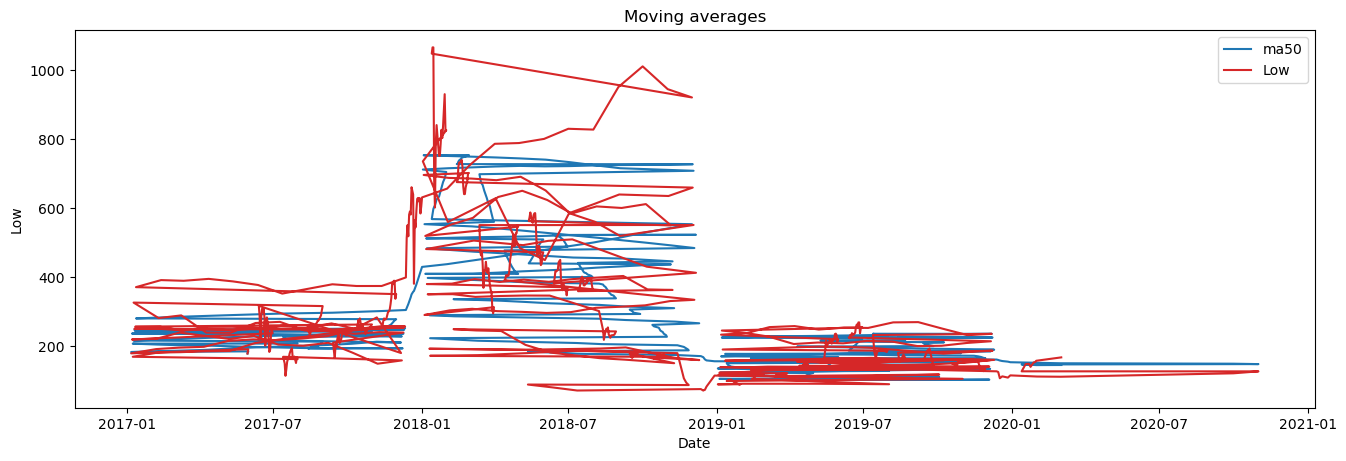

In [11]:
a = [50, 200]
nVis(df, "Low", roll = 50)

In [8]:
def nLogReturns(df, x):
    '''
    This function takes a data frame and the column
    that is to be used to calculate log returns. 
    For this function I will not add a time seperator since
    it is not neccissary in this case.
    '''
    df[f"log{x}"] = np.log(df[x]) / np.log(df[x].shift(1))

In [9]:
nLogReturns

<function __main__.nLogReturns(df, x)>

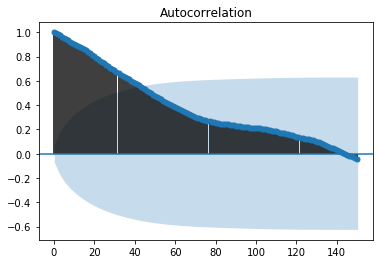

In [10]:
plot_acf(df["Open"], lags = 150)
plt.show()